# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Ignore warnings
import warnings as wns
wns.filterwarnings('ignore')

In [2]:
# import numpy and pandas libraries for data manipulation
import pandas as pd
import numpy as np 

# import matplotlib and seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

### Understanding the structure of the data

In [3]:
# read the data usinf read_csv() method
Foodhub_Data = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows using head() method
Foodhub_Data.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The FoodHub DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. From the first 5 rows, we can understand that the rating is not available for every order placed.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [4]:
# use shape property to print the dimensionality of the DataFrame.
Foodhub_Data.shape

(1898, 9)

#### Observations:
There are 9 columns in the dataset and there are 1898 rows.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [5]:
# use info() method to print a concise summary of the pandas DataFrame
Foodhub_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Out of the 9 columns in this dataset, 5 of them are quantitative (int and float) and 4 of them are qualitative (object).

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [6]:
# converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# for loop to loop through the dataframe
# astype() method to assign the datatype "category"
for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week']:
    if Foodhub_Data.dtypes[col] == np.object:
        Foodhub_Data[col] = Foodhub_Data[col].astype('category')

# use info() method to print a concise summary of the DataFrame
Foodhub_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 103.7+ KB


#### Observations:
Out of the 4 'object' columns, 3 of them are updated to 'category'. This has effectively reduced the memory storage from 133.6 KB to 103.7 KB.

In [7]:
# using isnull().sum() method to count the number of null columns in the dataframe
Foodhub_Data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
# Let's try this method to get the count of missing values and precentage of missing values in the dataset in a nice format
def missing_value_check(df):
    total_missing_values = df.isnull().sum().sort_values(ascending=False)
    total_count = df.isnull().count().sort_values(ascending=False)
    percent = (total_missing_values)/(total_count).sort_values(ascending=False)
    missing_data = pd.concat([total_missing_values,percent], axis=1, keys=["Total Missing Values","Percentage"])
    return missing_data
missing_value_check(Foodhub_Data)

Total Missing Values  Percentage
delivery_time                             0         0.0
food_preparation_time                     0         0.0
rating                                    0         0.0
day_of_the_week                           0         0.0
cost_of_the_order                         0         0.0
cuisine_type                              0         0.0
restaurant_name                           0         0.0
customer_id                               0         0.0
order_id                                  0         0.0

#### Observations:
There are no missing values in this dataframe. This elimiates the need to handle the missing values.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [9]:
# using the describe() menthod to get the 5 point summary of the numerical columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
np.round(Foodhub_Data.describe(),2).T

count        mean        std         min         25%  \
order_id               1898.0  1477495.50     548.05  1476547.00  1477021.25   
customer_id            1898.0   171168.48  113698.14     1311.00    77787.75   
cost_of_the_order      1898.0       16.50       7.48        4.47       12.08   
food_preparation_time  1898.0       27.37       4.63       20.00       23.00   
delivery_time          1898.0       24.16       4.97       15.00       20.00   

                              50%         75%         max  
order_id               1477495.50  1477969.75  1478444.00  
customer_id             128600.00   270525.00   405334.00  
cost_of_the_order           14.14       22.30       35.41  
food_preparation_time       27.00       31.00       35.00  
delivery_time               25.00       28.00       33.00

#### Observations:
1. The columns order id and customer id are identity columns and their summary statistics are not significant.
2. The 'cost_of_the_order' column have a median of $14.14 and a mean of 16.50. Since the mean is greater than median it indicates that the data is right skewed.
3. The 'food_preparation_time' have a median of 27 and a mean of 27.37. The mean and median are almost same, there is no significant skewness in this data.
4. The 'delivery_time' column have a median of 25 and a mean of 24.16. Since the mean is less than median it indicates that the data is slightly left skewed.

In [10]:
# using the describe() menthod to get the 5 point summary 
# using 'include' to inculde "object" and "category" columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
Foodhub_Data.describe(include=['object','category']).T

count unique          top  freq
restaurant_name  1898    178  Shake Shack   219
cuisine_type     1898     14     American   584
day_of_the_week  1898      2      Weekend  1351
rating           1898      4    Not given   736

#### Observations:
1. From the 1898 observations, we can see that data is collected for 178 restaurants. The most frequented restaurant is 'Shake Shack'
2. There are 14 distinct cuisines types, American cuisine is way more popular than others.
3. Day of the week column has only two values - Weekday and Weekend. Weekend is more popular than weekdays.
4. The rating field has 4 unique values, but rating is not given by customers on 736 out of 1898 ocassions.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [11]:
# Idea 1
# using the value_counts() menthod to get the count of each value in a dataframe column.
print(Foodhub_Data['rating'].value_counts())

# Idea 2
# filter the orders with 'rating' = "Not given" and get the count using count() function
Foodhub_Data[Foodhub_Data['rating']=="Not given"]['rating'].count()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


736

#### Observations:
1. The rating field has 4 unique values - 3, 4, 5, 'Not given' 
2. Rating is not given by customers on 736 out of 1898 ocassions
3. This missing information has a significant impact when measuring customer satsifaction.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

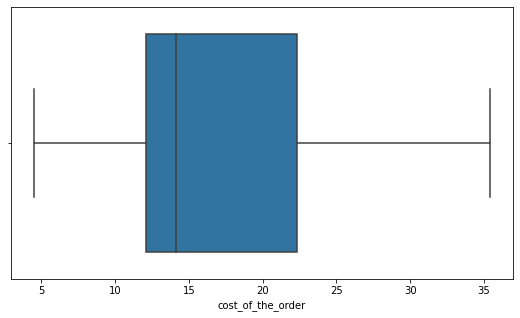

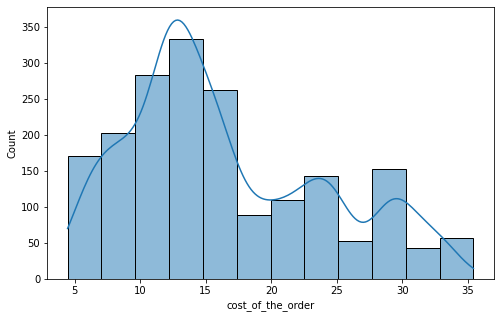

In [12]:
# Display a boxplot for the numeric column 'cost_of_the_order'
plt.figure(figsize=(9,5))
sns.boxplot(data=Foodhub_Data,x='cost_of_the_order')
plt.show()

# Display a histplot with kde curve for the numeric column 'cost_of_the_order'
plt.figure(figsize=(8,5))
sns.histplot(data=Foodhub_Data,x='cost_of_the_order',kde=True,bins=12)
plt.show()

#### Observations:
1. The box plot indicates that there are no outliers in the data.
2. The histplot indicates the positive skewness in the data.
3. Most of the 'cost_of_the_order' data is concentrated on 10-15 value range.

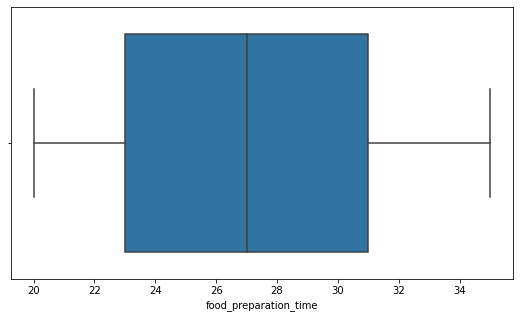

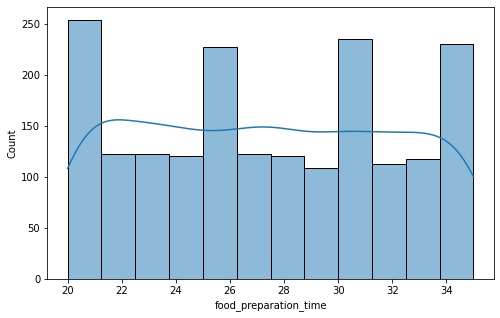

In [13]:
# Display a boxplot for the numeric column 'food_preparation_time'
plt.figure(figsize=(9,5))
sns.boxplot(data=Foodhub_Data,x='food_preparation_time')
plt.show()

# Display a histplot with kde curve for the numeric column 'food_preparation_time'
plt.figure(figsize=(8,5))
sns.histplot(data=Foodhub_Data,x='food_preparation_time',kde=True)
plt.show()

#### Observations:
1. The box plot indicates that there are no outliers in the data.
2. The histplot indicates that there is no skewness in the data.

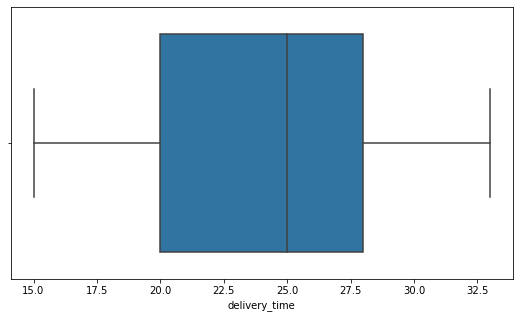

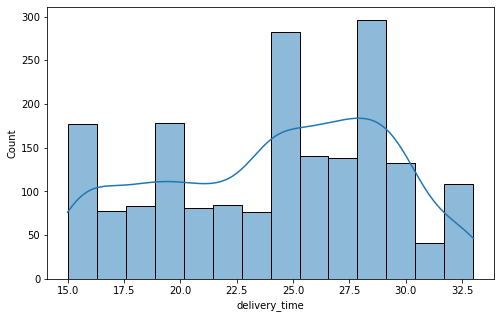

In [14]:
# Display a boxplot for the numeric column 'delivery_time'
plt.figure(figsize=(9,5))
sns.boxplot(data=Foodhub_Data,x='delivery_time')
plt.show()

# Display a histplot with kde curve for the numeric column 'delivery_time'
plt.figure(figsize=(8,5))
sns.histplot(data=Foodhub_Data,x='delivery_time',kde=True)
plt.show()

#### Observations:
1. The box plot indicates that there are no outliers in the data.
2. The histplot indicates the negative skewness in the data.
3. Most of the 'delivery time' data is concentrated on 24-29 value range.

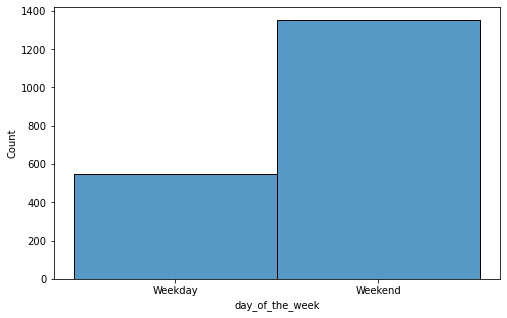

In [15]:
# Display a histplot with kde curve for the categorical column 'day_of_the_week'
plt.figure(figsize=(8,5))
sns.histplot(data=Foodhub_Data,x='day_of_the_week')
plt.show()

#### Observations:
1. Day of the week column has only two values - Weekday and Weekend. Weekend is more popular than weekdays.

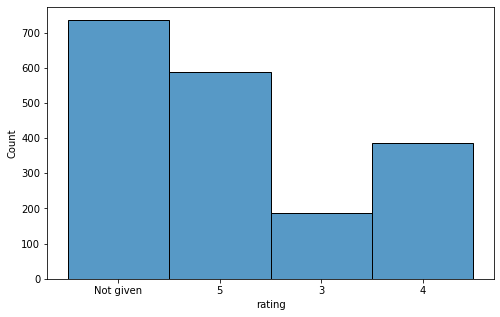

In [16]:
# Display a histplot with kde curve for the categorical column 'rating'
plt.figure(figsize=(8,5))
sns.histplot(data=Foodhub_Data,x='rating')
plt.show()

#### Observations:
1. The rating field has 4 unique values - 3, 4, 5 and Not Given.
2. Rating is not available for many customers, which will make it difficult to analyze data based on rating.

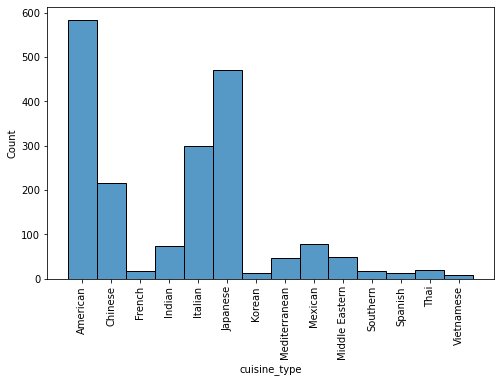

In [17]:
# Display a histplot with kde curve for the categorical column 'cuisine_type'
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.histplot(data=Foodhub_Data,x='cuisine_type')
plt.show()

#### Observations:
1. There are 14 distinct cuisines types, American, Japanese and Italian cuisines are more popular than others.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

The top 5 restaurants that have received the highest number of orders are as follows:
             restaurant_name  Total_no_of_orders
0                Shake Shack                 219
1          The Meatball Shop                 132
2          Blue Ribbon Sushi                 119
3  Blue Ribbon Fried Chicken                  96
4                       Parm                  68


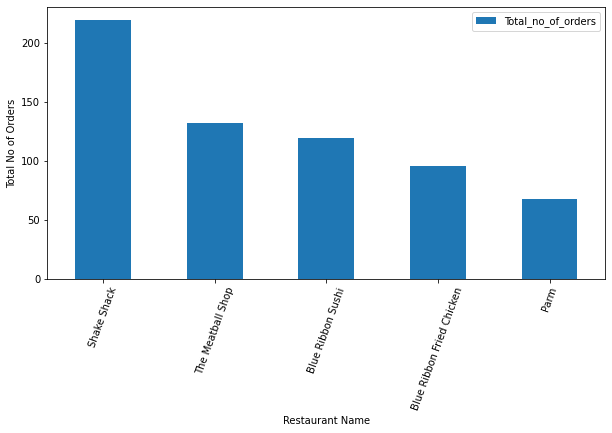

In [18]:
# Create a new dataframe grouped by 'restaurant_name' with top 5 count of orders sorted in desceding order.
Foodhub_Data_Grp_RestName = Foodhub_Data[['order_id','restaurant_name']].groupby(by=['restaurant_name']).count().sort_values(['order_id'],ascending=False).head(5)

# Rename the column 'order_id' to 'Total_no_of_orders'
Foodhub_Data_Grp_RestName.rename(columns={'order_id':'Total_no_of_orders'},inplace=True)

# Print the Grouped dataframe
print('The top 5 restaurants that have received the highest number of orders are as follows:')
print(Foodhub_Data_Grp_RestName.reset_index())

# Create the bar plot for Grouped dataframe
Foodhub_Data_Grp_RestName.reset_index().plot(x='restaurant_name',y='Total_no_of_orders',kind='bar',figsize=(10,5))
# Rotating the x axis labels
plt.xticks(rotation=70)
# Set the x axis label
plt.xlabel('Restaurant Name')
# Set the y axis label
plt.ylabel('Total No of Orders')
plt.show()

#### Observations:
1. The top 5 restaurants that have received the highest number of orders are 'Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken' and 'Parm'.
2. These top 5 restaurants have 634 orders that is approximately 33% of all orders in this analysis.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

      cuisine_type  Total_no_of_orders
0         American                 415
1         Japanese                 335
2          Italian                 207
3          Chinese                 163
4          Mexican                  53
5           Indian                  49
6    Mediterranean                  32
7   Middle Eastern                  32
8             Thai                  15
9           French                  13
10          Korean                  11
11        Southern                  11
12         Spanish                  11
13      Vietnamese                   4


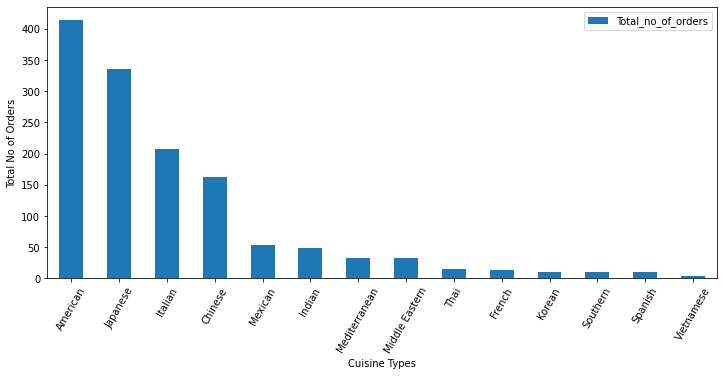

In [19]:
# Create a dataframe to filter the Weekend orders.
Foodhub_Data_Weekend = Foodhub_Data[Foodhub_Data['day_of_the_week']=="Weekend"]

# Create a dataframe grouping Weekend orders by 'cuisine_type' sorted by number of orders
Foodhub_Data_Grp_Cousine = Foodhub_Data_Weekend[['order_id','cuisine_type']].groupby(by=['cuisine_type']).count().sort_values(['order_id'],ascending=False)

# Rename the column 'order_id' to 'Total_no_of_orders'
Foodhub_Data_Grp_Cousine.rename(columns={'order_id':'Total_no_of_orders'},inplace=True)

# Print the Grouped dataframe
print(Foodhub_Data_Grp_Cousine.reset_index())

# Create the bar plot for Grouped dataframe
Foodhub_Data_Grp_Cousine.reset_index().plot(x='cuisine_type',y='Total_no_of_orders',kind='bar',figsize=(12,5))
# Rotating the x axis labels
plt.xticks(rotation=60)
# Set the x axis label
plt.xlabel('Cuisine Types')
# Set the y axis label
plt.ylabel('Total No of Orders')
plt.show()

#### Observations:
1. The most popular cuisine on weekends is 'American'.
2. 'American' cuisine have received 415 orders during the weekend.
3. 'American' cuisine is followed by Japanese, Italian and Chinese cuisines.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [20]:
# Create a dataframe to filter orders with cost greater than 20.
Foodhub_Data_20 = Foodhub_Data[Foodhub_Data['cost_of_the_order']>20]

# Print the number of rows in dataframe with cost greater than 20.
print('The number of orders with cost greater than 20 is',len(Foodhub_Data_20))

# Print the percentage of rows in dataframe with cost greater than 20.
# Using round() method to round up the result to two decimal points.
print('The percentage of orders with cost greater than 20 is',np.round((len(Foodhub_Data_20)/len(Foodhub_Data))*100,decimals=2),'%')

The number of orders with cost greater than 20 is 555
The percentage of orders with cost greater than 20 is 29.24 %


#### Observations:
1. The number of orders with cost greater than 20 is 555
2. The percentage of orders with cost greater than 20 is 29.24 %
3. The calculation is as follows:

$$
\frac{555}{1898} * 100 = 29.24\\
$$

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [21]:
# Calculating arithmetic mean using mean() method.
# Using round() method to round up the result to two decimal points.
np.round(Foodhub_Data['delivery_time'].mean(),2)

24.16

#### Observations:
1. The 'delivery_time' column have a mean of 24.16. 

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [22]:
# Calculating maximum cost using max() method.
Max_Amount = Foodhub_Data['cost_of_the_order'].max()

# Filter the row by matching the 'Max_Amount' to 'cost_of_the_order' in the dataset
Foodhub_Data[Foodhub_Data['cost_of_the_order']==Max_Amount]

order_id  customer_id restaurant_name   cuisine_type  cost_of_the_order  \
573   1477814        62359           Pylos  Mediterranean              35.41   

    day_of_the_week rating  food_preparation_time  delivery_time  
573         Weekday      4                     21             29

#### Observations:
1. The customer who spent the maximum amount is customer_id 62359.
2. The restaurant_name was Pylos and the cuisine_type was Mediterranean.
3. The cost of the order is $35.41 and the order is placed on a weekday.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

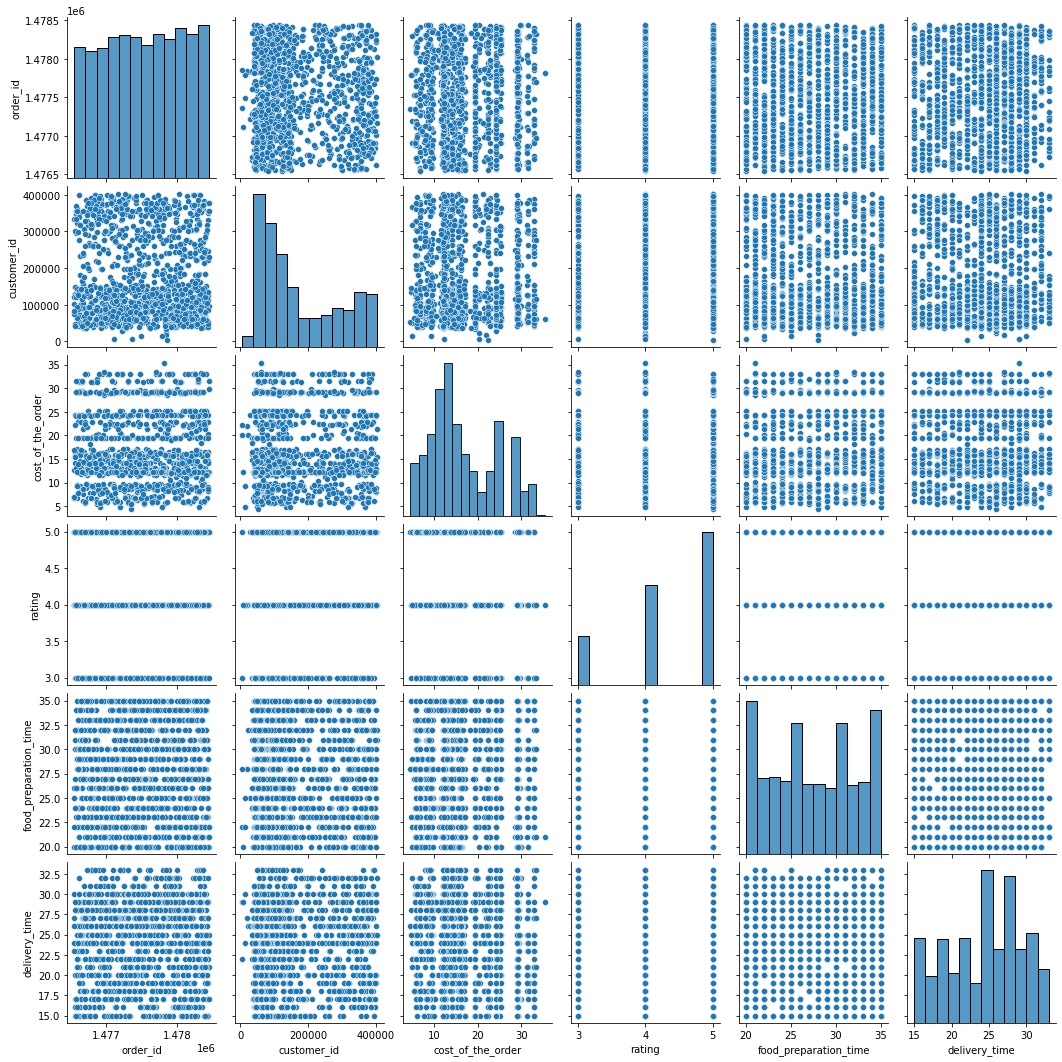

In [23]:
# Create a dataframe to filter the orders with a valid numeric rating
Foodhub_Data_Rated = Foodhub_Data[Foodhub_Data['rating']!="Not given"]
# Conver the column 'rating' from object to integer for numeric operations
Foodhub_Data_Rated['rating'] = Foodhub_Data_Rated['rating'].astype('int64')

# Display a pair plot to find the relationship between numerical fields.
sns.pairplot(Foodhub_Data_Rated)
plt.show()

#### Observations:
This is painful, there seems to be no correlation between the numerical fields in this dataset.

In [24]:
# Print the correlation between numerical columns.
Foodhub_Data_Rated.corr().round(2)

order_id  customer_id  cost_of_the_order  rating  \
order_id                   1.00         0.00               0.05    0.01   
customer_id                0.00         1.00              -0.00    0.01   
cost_of_the_order          0.05        -0.00               1.00    0.03   
rating                     0.01         0.01               0.03    1.00   
food_preparation_time      0.03        -0.04               0.04   -0.01   
delivery_time              0.00        -0.01              -0.08   -0.01   

                       food_preparation_time  delivery_time  
order_id                                0.03           0.00  
customer_id                            -0.04          -0.01  
cost_of_the_order                       0.04          -0.08  
rating                                 -0.01          -0.01  
food_preparation_time                   1.00          -0.01  
delivery_time                          -0.01           1.00

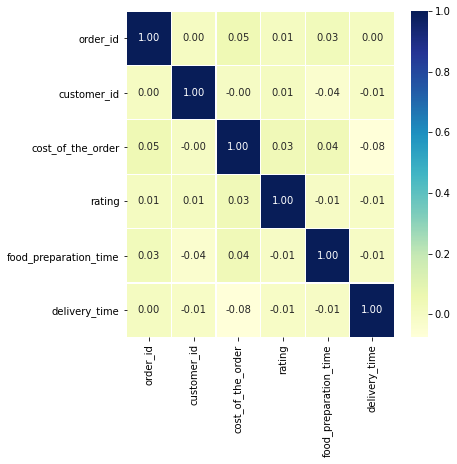

In [25]:
# Display a heat map to find the relationship between numerical fields.
plt.figure(figsize=(6,6))
sns.heatmap(Foodhub_Data_Rated.corr(),annot=True,linewidths=0.2,fmt=".2f",cmap="YlGnBu")
plt.show()

#### Observations:
1. Heat map depicts the same picture we saw in the pairplot.
2. There seems to be no correlation between the numerical fields in this dataset.

#### Let's look at the relationship between categorical and numerical fields

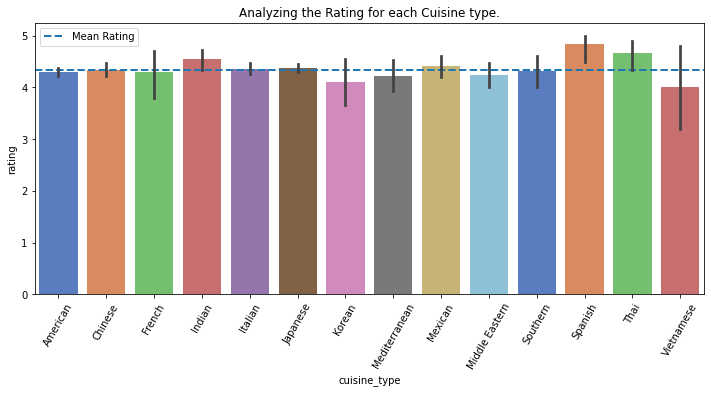

In [26]:
# Bar plot for analyzing the Rating for each Cuisine type

# Set the figure size, x-axis label rotation and title for the plot
plt.figure(figsize=(12,5))
plt.xticks(rotation=60)
plt.title("Analyzing the Rating for each Cuisine type.")

# Draw the horizontal axis line for mean rating
plt.axhline(Foodhub_Data_Rated['rating'].mean(),linestyle="dashed",linewidth=2,label="Mean Rating")

# Show the barplot with a legend
sns.barplot(x="cuisine_type",y="rating",data=Foodhub_Data_Rated,palette="muted")
plt.legend()
plt.show()

#### Observations:
1. No significant difference in rating for each cuisines.
2. We can see that Indian, Spanish and Thai restaurants have better rating than others.
3. Also note that the popularity of American, Japanese and Italian cuisines did not translate into high ratings
4. Again, keep in mind that a good chunk of the customers did not rate the service provided.

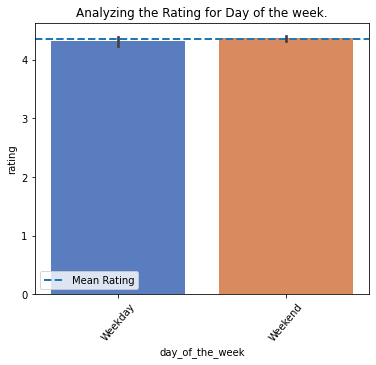

In [27]:
# Bar plot for analyzing the Rating for day of the week

# Set the figure size, x-axis label rotation and title for the plot
plt.figure(figsize=(6,5))
plt.xticks(rotation=50)
plt.title("Analyzing the Rating for Day of the week.")

# Draw the horizontal axis line for mean rating
plt.axhline(Foodhub_Data_Rated['rating'].mean(),linestyle="dashed",linewidth=2,label="Mean Rating")

# Show the barplot with a legend
sns.barplot(x="day_of_the_week",y="rating",data=Foodhub_Data_Rated,palette="muted")
plt.legend()
plt.show()

#### Observations:
1. No significant difference in rating for days of the week.
2. Weekend seems to have a slightly higher rating compared to weekdays, but here we are looking at a dataset with more data for weekend deliveries.

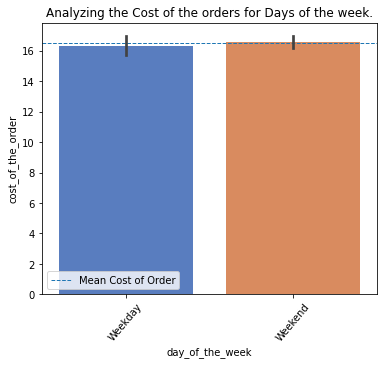

In [28]:
# Bar plot for analyzing the Cost of the order for days of the week

# Set the figure size, x-axis label rotation and title for the plot
plt.figure(figsize=(6,5))
plt.xticks(rotation=50)
plt.title("Analyzing the Cost of the orders for Days of the week.")

# Draw the horizontal axis line for mean rating
plt.axhline(Foodhub_Data['cost_of_the_order'].mean(),linestyle="dashed",linewidth=1,label="Mean Cost of Order")

# Show the barplot with a legend
sns.barplot(x="day_of_the_week",y="cost_of_the_order",data=Foodhub_Data,palette="muted")
plt.legend()
plt.show()

#### Observations:
1. No significant difference in cost of order for days of the week.
2. Weekend seems to be costly compared to weekdays, but here we are looking at a dataset with more data for weekend deliveries.

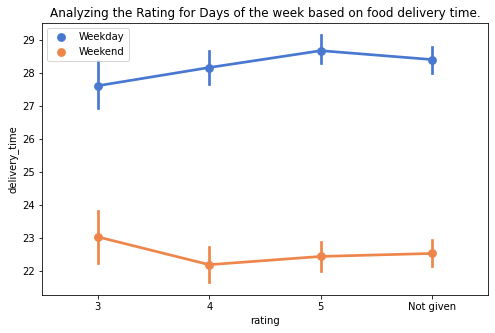

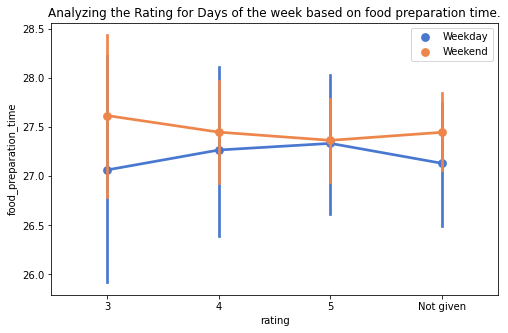

In [29]:
# Point plot for analyzing the rating for days of the week based on food delivery time and food preparation time.

# Sort the dataset by rating field.
Foodhub_Data_Rating_Sorted = Foodhub_Data.sort_values(by=['rating'],ascending="False")

# Set the figure size and title for the plot
plt.figure(figsize=(8,5))
plt.title("Analyzing the Rating for Days of the week based on food delivery time.")

# Show the pointplot with a legend
sns.pointplot(x="rating",y="delivery_time",data=Foodhub_Data_Rating_Sorted,palette="muted",hue='day_of_the_week')
plt.legend()
plt.show()

# Set the figure size and title for the plot
plt.figure(figsize=(8,5))
plt.title("Analyzing the Rating for Days of the week based on food preparation time.")

# Show the pointplot with a legend
sns.pointplot(x="rating",y="food_preparation_time",data=Foodhub_Data_Rating_Sorted,palette="muted",hue='day_of_the_week')
plt.legend()
plt.show()

#### Observations:
1. Now, here is a significant difference in food delivery times between Weekdays and Weekends while the preparation time is almost the same.
2. The food delivery times of Weekdays is from 27 to 29 minutes, but it is down to 22 to 23 minutes on Weekends.
3. It can also be noted that this differance in food delivery times between Weekdays and Weekends does not have an impact on the ratings.

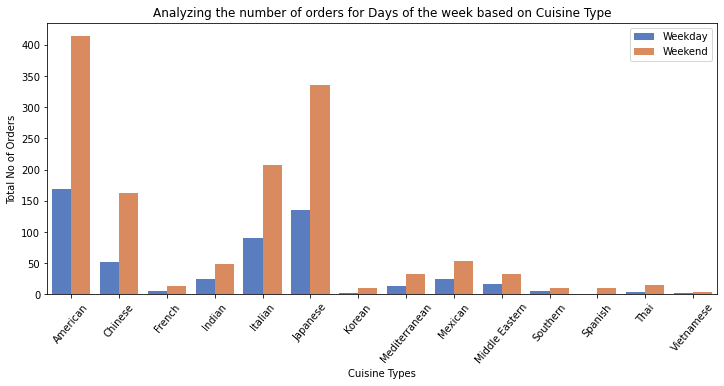

In [30]:
# Bar plot for analyzing the number of orders for Days of the week based on Cuisine Type

# Set the figure size, x-axis label rotation and title for the plot
plt.figure(figsize=(12,5))
plt.xticks(rotation=50)
plt.title("Analyzing the number of orders for Days of the week based on Cuisine Type")

# Group the dataset by cuisine_type and day_of_the_week and count the number of orders.
Foodhub_Data_Grp_Cousine_Day = Foodhub_Data[['order_id']].groupby(by=[Foodhub_Data['cuisine_type'],Foodhub_Data['day_of_the_week']]).count()

# Show the barplot with a legend, x-label and y-label.
sns.barplot(x="cuisine_type",y="order_id",data=Foodhub_Data_Grp_Cousine_Day.reset_index(),palette="muted",hue='day_of_the_week')
plt.xlabel('Cuisine Types')
plt.ylabel('Total No of Orders')
plt.legend()
plt.show()

#### Observations:
1. The number of orders placed in the Weekend is much higher compared to weekdays.
2. Wanted to see if there is an outlier cuisine that has more order on the weekday, but no such scenario exists in this dataset.

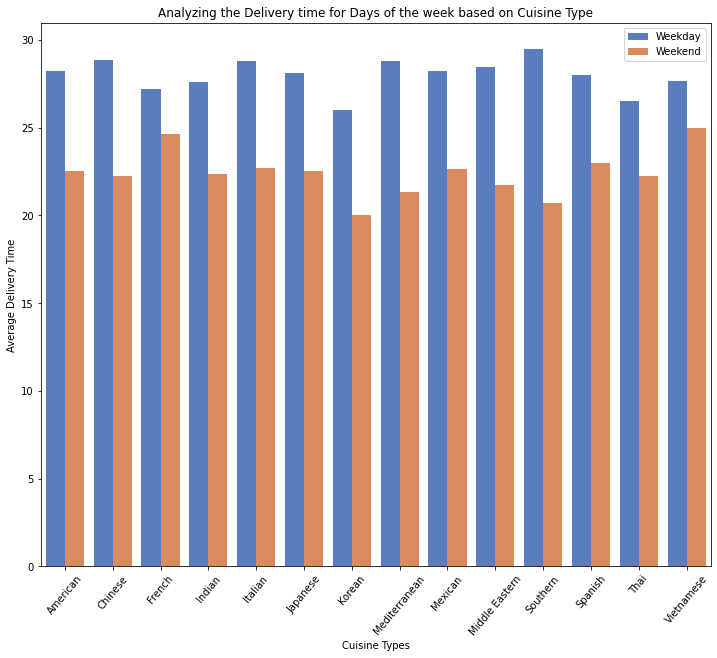

In [31]:
# Bar plot for analyzing the delivery time for Days of the week based on Cuisine Type

# Set the figure size, x-axis label rotation and title for the plot
plt.figure(figsize=(12,10))
plt.xticks(rotation=50)
plt.title("Analyzing the Delivery time for Days of the week based on Cuisine Type")

# Group the dataset by cuisine_type and day_of_the_week and mean of delivery_time
Foodhub_Data_Grp_Cousine_Day = Foodhub_Data[['delivery_time']].groupby(by=[Foodhub_Data['cuisine_type'],Foodhub_Data['day_of_the_week']]).mean()

# Show the barplot with a legend, x-label and y-label.
sns.barplot(x="cuisine_type",y="delivery_time",data=Foodhub_Data_Grp_Cousine_Day.reset_index(),palette="muted",hue='day_of_the_week')
plt.xlabel('Cuisine Types')
plt.ylabel('Average Delivery Time')
plt.legend()
plt.show()

#### Observations:
1. The delivery time of orders placed in the Weekend is less than the orders placed on weekdays.
2. Wanted to see if there is a outlier cuisine that has a delivery time higher in weekends. But no such scenario is observed here.

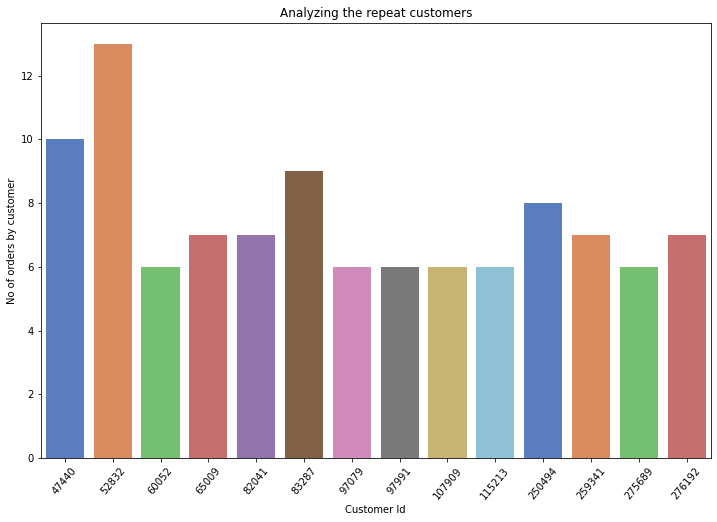

In [32]:
# Bar plot for analyzing the repeat customers (customers with more than 5 orders)

# Identify repeat customers by grouping data by customer id
Foodhub_Data_Customers = Foodhub_Data[['order_id','customer_id']].groupby(by=['customer_id']).count().reset_index()
# filter customers with number of orders greater than 5
Foodhub_Data_Repeat_Customers = Foodhub_Data_Customers[Foodhub_Data_Customers['order_id']>5]
# Rename the column 'order_id' to 'No_of_orders_by_customer'
Foodhub_Data_Repeat_Customers.rename(columns={'order_id':'No_of_orders_by_customer'},inplace=True)

# Set the figure size, x-axis label rotation and title for the plot
plt.figure(figsize=(12,8))
plt.xticks(rotation=50)
plt.title("Analyzing the repeat customers")

# Show the barplot with a legend, x-label and y-label.
sns.barplot(x="customer_id",y="No_of_orders_by_customer",data=Foodhub_Data_Repeat_Customers,palette="muted")
plt.xlabel('Customer Id')
plt.ylabel('No of orders by customer')
plt.show()

#### Observations:
1. 14 customers in this dataset have placed more than 5 orders.
2. The total number of orders placed by these 14 customers is 104.
3. Out of the 1200 unique customers in the dataset, 416 of them have placed multiple orders.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [33]:
# Create a dataframe to filter the orders with a valid numeric rating
Foodhub_Data_Rated = Foodhub_Data[Foodhub_Data['rating']!="Not given"]
# Conver the column 'rating' from object to integer for numeric operations
Foodhub_Data_Rated['rating'] = Foodhub_Data_Rated['rating'].astype('int64')

# Create a dataframe 'Foodhub_Data_Rated_51' grouping 'restaurant_name' to get the count of rating
Foodhub_Data_Rated_51 = Foodhub_Data_Rated[['restaurant_name','rating']].groupby(by=['restaurant_name']).count().sort_values(['rating'],ascending=False)
# Filter the rows with number of rating greater than 50
Foodhub_Data_Rated_51 = Foodhub_Data_Rated_51[Foodhub_Data_Rated_51['rating']>50]
# Rename the column 'rating' to 'Total_no_of_ratings'
Foodhub_Data_Rated_51.rename(columns={'rating':'Total_no_of_ratings'},inplace=True)

# Create a dataframe 'Foodhub_Data_Rated_Av4' grouping 'restaurant_name' to get the arithmetic mean of ratings
Foodhub_Data_Rated_Av4 = Foodhub_Data_Rated[['restaurant_name','rating']].groupby(by=['restaurant_name']).mean().sort_values(['rating'],ascending=False)
# Filter the rows with arithmetic mean of rating greater than 4
Foodhub_Data_Rated_Av4 = Foodhub_Data_Rated_Av4[Foodhub_Data_Rated_Av4['rating']>4]
# Rename the column 'rating' to 'Average_rating'
Foodhub_Data_Rated_Av4.rename(columns={'rating':'Average_rating'},inplace=True)

# Inner join both the dataframes on index to get the restaurants that satisfy both conditions
Foodhub_Data_Rated_51.join(Foodhub_Data_Rated_Av4,how='inner').reset_index()

restaurant_name  Total_no_of_ratings  Average_rating
0                Shake Shack                  133        4.278195
1          The Meatball Shop                   84        4.511905
2          Blue Ribbon Sushi                   73        4.219178
3  Blue Ribbon Fried Chicken                   64        4.328125

#### Observations:
1. There are only 4 restaurants who have a number of rating more than 50 and average rating more than 4.
2. They are 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi' and 'Blue Ribbon Fried Chicken'.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [34]:
# Create a function to implement the logic of applying company charges based on cost of order.
def fn_company_charges(df):
    if df['cost_of_the_order'] > 20:
        return np.round(df['cost_of_the_order']*0.25,2)
    elif df['cost_of_the_order'] > 5:
        return np.round(df['cost_of_the_order']*0.15,2)
    else:
        return 0

# Create a copy of original dataset
Foodhub_Data_CC = Foodhub_Data.copy()

# Apply a function along the column axis of the DataFrame.
Foodhub_Data_CC['company_charges'] = Foodhub_Data_CC.apply(fn_company_charges,axis=1)

# Get the sum of company charges using sum() method.
# Using round() method to round up the result to two decimal points.
np.round(Foodhub_Data_CC['company_charges'].sum(),2)

6166.4

#### Observations:
1. The total revenue generated for all orders is $6166.40

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [35]:
# Create a copy of original dataset with only three columns - 'order_id','food_preparation_time' and 'delivery_time'
Foodhub_Data_DT = Foodhub_Data[['order_id','food_preparation_time','delivery_time']].copy()

# Insert a new column 'total_delivery_time' adding 'food_preparation_time' and 'delivery_time'
Foodhub_Data_DT.insert(3,'total_delivery_time',Foodhub_Data_DT['food_preparation_time']+Foodhub_Data_DT['delivery_time'])

# Print the number of orders with delivery time more than 60 mins
print('Number of orders with delivery time more than 60 mins are',len(Foodhub_Data_DT[Foodhub_Data_DT['total_delivery_time']>60]))

# Print the percentage of orders with delivery time more than 60 mins
# Using round() method to round up the result to four decimal points.
print('Percentage of orders with delivery time more than 60 mins are',np.round((len(Foodhub_Data_DT[Foodhub_Data_DT['total_delivery_time']>60])/(len(Foodhub_Data)))*100,4),'%')

Number of orders with delivery time more than 60 mins are 200
Percentage of orders with delivery time more than 60 mins are 10.5374 %


#### Observations:
1. Number of orders with delivery time more than 60 mins are 200
2. Percentage of orders with delivery time more than 60 mins are 10.5374 %

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [36]:
# Grouping 'day_of_the_week' column to get the arithmetic mean of delivery_time
# Calculating arithmetic mean using mean() method.
# Using round() method to round up the result to two decimal points.
Foodhub_Data[['day_of_the_week','delivery_time']].groupby(by=['day_of_the_week']).mean().round(2)

delivery_time
day_of_the_week               
Weekday                  28.34
Weekend                  22.47

#### Observations:
1. The arithmetic mean of delivery time for Weekday is 28.34 and for Weekend is 22.47.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights:
As per the problem statement, the food aggregator company wants to understand the demand of different restaurants which will help them in enhancing their customer experience. The conclusions and business recommendations include:
1. The dataset provided has the customer rating missing for one-third of the orders. The food aggregator company should incentivize the customers to review their orders. (like reward points, that can be aggregated and redeemed for future orders.)
2. One of the major factors that can impact the customer rating is the date and time of the order. Adding this to the dataset would help identify how the customer satisfaction (rating) changed over time.
3. There is a significant difference in food delivery times between Weekdays and Weekends. The food delivery time for weekdays need to be improved by having more delivery persons available on weekdays.
4. As per the dataset, the number of orders in weekdays are lower than weekends. The food aggregator company can offer a weekday discount for customers to increase the number of orders in weekdays. (When the customer orders food on the weekend, send a 5% off coupon that can be used on coming Monday to Thursday)
5. American and Japanese cuisines are more popular as per the dataset, but Spanish, Thai and Indian cuisines have higher than average ratings. Hence there is an appetite for different cuisines in the region and that can be explored by adding more cuisines to the list.
6. Since the weekends have more orders, the food aggregator company can increase the company charges on weekends. This increased revenue can make up for the lack of demand on weekdays.
7. Out of the 1200 unique customers in the dataset, 416 of them have placed multiple orders. To retain this customer base, the food aggregator company can offer a subscription program (fixed fees for a month regardless of the number of orders).